In [7]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from implementations import *
from proj1_helpers import *
from misc_helpers import *
from plot_functions import *
from ml_math import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Optimizing Learning for LR

### Load Data

In [8]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y_data, x_data, ids = load_csv_data(DATA_TRAIN_PATH)

### Standardize

In [9]:
y = normalize(y_data)
x = normalize(x_data)

## Find the best number of gamma

In [13]:
# 'New' build_poly used in the labs correction, the old one should also work but you're never sure
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = np.ones((len(x), 1))
    for deg in range(1, int(degree+1)):
        poly = np.c_[poly, np.power(x, deg)]
    return poly

# Build_k_indices to do cross validation
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval : (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation(y, x, k_indices, k, gamma, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_te = x[te_indice]
    x_tr = x[tr_indice]
    # form data with polynomial degree
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    # ridge regression
    initial_w = np.zeros(len(tx_tr[1,:]))
    max_iter = 100
    w, _ = logistic_regression(y_tr, tx_tr, initial_w, max_iter, gamma, verbose = False, use_SGD = True, batch_size = 1)
    # calculate the loss for train and test data
    loss_tr = np.sqrt(2 * compute_MSE(y_tr, tx_tr, w))
    loss_te = np.sqrt(2 * compute_MSE(y_te, tx_te, w))
    return loss_tr, loss_te, w

def cross_validation_visualization(degree, rmse_tr, rmse_te):
    """visualization the curves of mse_tr and mse_te."""
    # use either 'normal', semilogx, semilogy or loglog
    plt.semilogy(degree, rmse_tr, marker=".", color='b', label='train error')
    plt.semilogy(degree, rmse_te, marker=".", color='r', label='test error')
    plt.xlabel("degree")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")
    
def cross_validation_demo():
    # if you change between lin and log space, don't forget to update cross_validation_visualization
    nb = 10
    seed = 1
    degrees = np.linspace(1, 10, nb)
    k_fold = 4
    gamma = 0.001
    i = 0
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    for degree in degrees:
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te, _ = cross_validation(y, x, k_indices, k, gamma, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))
        i = i + 1
        print(i / nb * 100)
        print("% done")
    
    print(rmse_tr)
    print(rmse_te)
    cross_validation_visualization(degrees, rmse_tr, rmse_te)

10.0
% done
20.0
% done
30.0
% done
40.0
% done
50.0
% done
60.0
% done
70.0
% done
80.0
% done
90.0
% done
100.0
% done
[0.04886186697600105, 0.04885390406457714, 0.04885408070914862, 0.048857982730096804, 0.048848975316683134, 0.04886773740380301, 0.04886088645534077, 0.04885388392071152, 0.04885505691528776, 0.04886792300040369]
[0.04886186665058743, 0.048853903149296704, 0.048854079979361385, 0.04885798208078374, 0.048848974092333866, 0.04886773625508815, 0.04886088533161716, 0.04885388313517166, 0.0488550560154451, 0.04886792239156439]


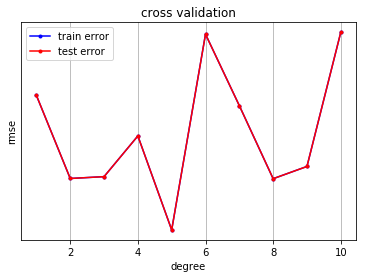

In [14]:
cross_validation_demo()